In [1]:
import subprocess
import pandas as pd
import numpy as np
import csv

In [2]:
LONG_LONG_MAX =  9223372036854775807

#CHANGE FOR DIMS HERE
n = 375
m = 800 
m2 = 476

#f =  open("Matrix_out.txt")
mat = np.random.randint(0,1000,size=(n,m))
print(mat)
np.savetxt("matrix1.txt",mat,fmt='%i')

mat2 = np.random.randint(0,1000,size=(m,m2))
print(mat2)
np.savetxt("matrix2.txt",mat2,fmt='%i')

matRes = np.matmul(mat,mat2)
print(matRes)
print(matRes.shape)
np.savetxt("matrixres.txt",matRes,fmt='%i')

[[ 92 635 498 ... 912 889 236]
 [986 205  71 ... 769 279 829]
 [475 306 656 ...  17 151 715]
 ...
 [163 837 722 ... 900 619  86]
 [118 130 970 ... 130 483 920]
 [431 607 973 ... 977 863 964]]
[[598 926 986 ... 272 173 578]
 [401 243 661 ... 718 712 701]
 [337 260 648 ...  33 456 210]
 ...
 [265 270 182 ... 540 897 719]
 [556 616 156 ... 528 670 269]
 [ 51 474  31 ... 621  71 804]]
[[205108835 200455946 195927035 ... 203228785 202000599 202222508]
 [205107583 204204470 198595115 ... 204856852 200405467 207296743]
 [201605458 196793530 191615539 ... 196970932 187851838 197489376]
 ...
 [203438019 200400703 195558848 ... 203510382 190672326 203573084]
 [194524754 194331830 190620726 ... 193103835 189409550 194654068]
 [205140492 200383679 195547629 ... 204753481 196793864 201352277]]
(375, 476)


In [3]:
subprocess.call(["gcc", "P1.c", "-o","P1.out", "-pthread"])
subprocess.call(["gcc", "P2.c", "-o","P2.out", "-pthread"])


# subprocess.call("gcc schedulercopy.c")

f1 = open('datap1.csv', 'w')
f2 = open('datap2.csv', 'w')

writer1 = csv.writer(f1)
writer2 = csv.writer(f2)

header1 = ['dim1', 'dim2', 'dim3', 'num_threads', 'time (ns)']
header2 = ['dim1', 'dim2', 'dim3', 'num_threads', 'time (ns)']

writer1.writerow(header1)
writer2.writerow(header2)

f1.close()
f2.close()

In [4]:

#FOR THREADS CHANGE HERE
for i in range(1, 100):
    p1 = "./P1.out "+str(n)+" "+str(m)+" "+str(m2)+" "+"matrix1.txt matrix2.txt out.txt "+ str(i) +" 1"
    tmp=subprocess.call(p1.split()) 
    print("printing result")
    #print(tmp)
    p2 = "./P2.out "+str(n)+" "+str(m)+" "+str(m2)+" "+"matrix1.txt matrix2.txt out.txt 1 "+ str(i)
    tmp=subprocess.call(p2.split()) 
    print("printing result")
    #print(tmp)
# #dataP1.txt

P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
printing result
P2 ends here
printing result
P1 ends here
p

Text(0.5, 1.0, 'P1 execution time vs No of threads for dim 150 200 170')

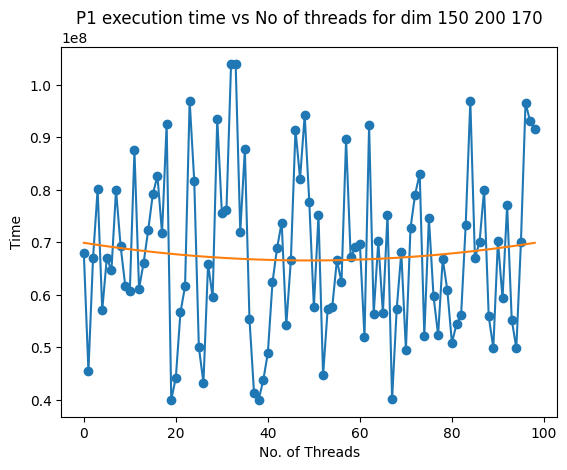

In [ ]:
df = pd.read_csv("datap1.csv")

#df = df.groupby('num_threads').min('time(ns)')
#print(df.head)

import matplotlib.pyplot as plt

ax = plt.axes()
ax.scatter(df.index,df['time (ns)'])
ax.plot(df.index,df['time (ns)'])

z = np.polyfit(df.index, df['time (ns)'], 2)
p = np.poly1d(z)
ax.plot(df.index, p(df.index))

ax.set_xlabel('No. of Threads')
ax.set_ylabel('Time')
ax.set_title("P1 execution time vs No of threads for dim "+str(n)+ " "+str(m) +" "+str(m2))

Text(0.5, 1.0, 'P2 execution time vs No of threads for dim 150 200 170')

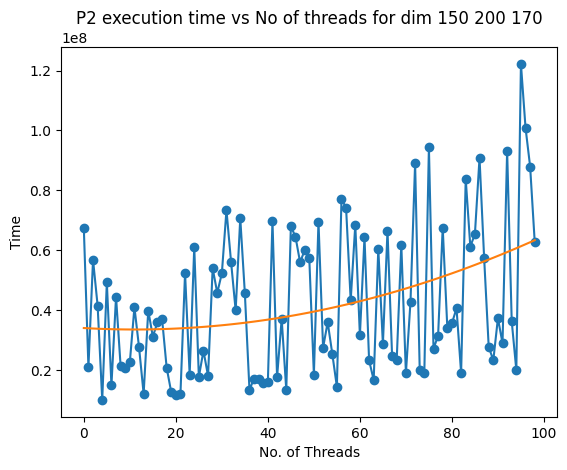

In [ ]:
df = pd.read_csv("datap2.csv")

#df = df.groupby('num_threads').min('time(ns)')
#print(df.head)

import matplotlib.pyplot as plt
ax = plt.axes()
ax.scatter(df.index,df['time (ns)'])
ax.plot(df.index,df['time (ns)'])

z = np.polyfit(df.index, df['time (ns)'], 2)
p = np.poly1d(z)
ax.plot(df.index, p(df.index))

ax.set_xlabel('No. of Threads')
ax.set_ylabel('Time')
ax.set_title("P2 execution time vs No of threads for dim "+str(n)+ " "+str(m) +" "+str(m2))